# ML Lab3
#### Author: Pumnia Mykhailo, KM-22
---

Step 1. Open and read the provided data file.

In [1]:
import pandas as pd

data = pd.read_csv('./ЛР3-пгр1.csv')


Step 2. Determine and display the number of records and the number of fields in the loaded dataset.

In [2]:
records_n, fields_n = data.shape
print(f'Records: {records_n}, Fields: {fields_n}')

Records: 19019, Fields: 11


Step 3. Display the first 10 records of the dataset.

In [3]:
data.head(10)

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
5,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.087,g
6,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.134,g
7,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.226,g
8,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.251,g
9,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.094,g


Step 4. Divide the dataset into training and test sets, having previously mixed the initial dataset.

In [4]:
from sklearn.model_selection import train_test_split

TEST_SET_PERCENTAGE = 0.3
RANDOM_STATE = 37


train_data, test_data = train_test_split(data, test_size=TEST_SET_PERCENTAGE, random_state=RANDOM_STATE)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

Step 5. Using the appropriate functions of the scikit-learn library, build a depth 5 decision tree classification model and train it on the training set, assuming that in the provided dataset the target characteristic is determined by the last column, and all the others act as output arguments.

In [5]:
from sklearn.tree import DecisionTreeClassifier

gini_dtc = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)
gini_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=37)

Step 6. Graphically present the constructed tree using the graphviz library.

In [6]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = [f'X{i}' for i in range(1, fields_n)]

dot_data = export_graphviz(
    gini_dtc, 
    feature_names=feature_names,  
    class_names=gini_dtc.classes_,  
    filled=True, rounded=True, special_characters=True
)

graph = graphviz.Source(dot_data)
graph.view("decition_tree", cleanup=True) 

'decition_tree.pdf'

Step 7. Calculate the classification metrics of the constructed model for the training and test sets. Present the results of the model's operation on the test set graphically. Compare the results obtained when using different splitting criteria: information gain based on entropy or Gini heterogeneity.

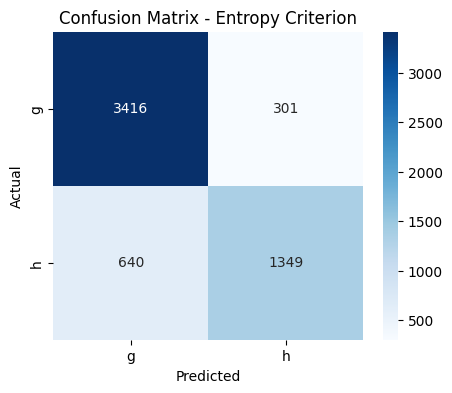

True: 4765
False: 941


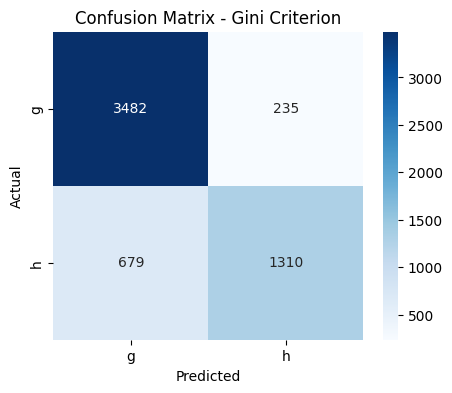

True: 4792
False: 914

===== Entropy Criterion =====
Classification Report (train set):
               precision    recall  f1-score   support

           g       0.83      0.92      0.87      8614
           h       0.81      0.67      0.73      4699

    accuracy                           0.83     13313
   macro avg       0.82      0.79      0.80     13313
weighted avg       0.83      0.83      0.82     13313

Classification Report (test set):
               precision    recall  f1-score   support

           g       0.84      0.92      0.88      3717
           h       0.82      0.68      0.74      1989

    accuracy                           0.84      5706
   macro avg       0.83      0.80      0.81      5706
weighted avg       0.83      0.84      0.83      5706


===== Gini Criterion =====
Classification Report (train set):
               precision    recall  f1-score   support

           g       0.83      0.94      0.88      8614
           h       0.85      0.66      0.74      

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

entropy_dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=RANDOM_STATE)
entropy_dtc.fit(X_train, y_train)

models = {
    "Entropy": entropy_dtc,
    "Gini": gini_dtc,
}

metrics_results = {}

for name, dtc in models.items():
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

    train_report = classification_report(y_train, y_train_pred, target_names=dtc.classes_)
    test_report = classification_report(y_test, y_test_pred, target_names=dtc.classes_)

    metrics_results[name] = {
        "Train Report": train_report,
        "Test Report": test_report,
    }

    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_test_pred, labels=dtc.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name} Criterion")
    plt.show()

    print(f'True: {cm[0][0] + cm[1][1]}')
    print(f'False: {cm[0][1] + cm[1][0]}')

for name, results in metrics_results.items():
    print(f"\n===== {name} Criterion =====")
    print("Classification Report (train set):\n", results["Train Report"])
    print("Classification Report (test set):\n", results["Test Report"])

Step 8. Find out the impact of the maximum number of leaves and the minimum number of elements in the internal node for its further splitting on the classification results. Present the results graphically.

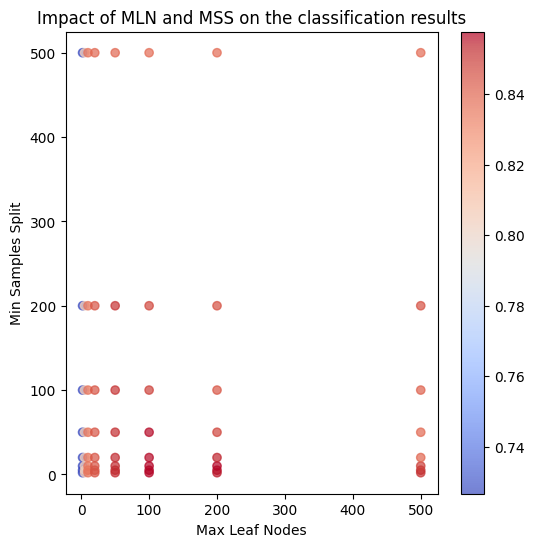

In [8]:
from sklearn.metrics import accuracy_score
from itertools import product
from matplotlib import cm

max_leaf_nodes = [2, 5, 10, 20, 50, 100, 200, 500]
min_samples_split = [2, 5, 10, 20, 50, 100, 200, 500]

points = []
for (mln, mss) in product(max_leaf_nodes, min_samples_split):
  dtc = DecisionTreeClassifier(max_leaf_nodes=mln, min_samples_split=mss, random_state=RANDOM_STATE)
  dtc.fit(X_train, y_train)
  
  y_test_pred = dtc.predict(X_test)
  accuracy = accuracy_score(y_test, y_test_pred)

  points.append((mln, mss, accuracy))

mln = list(map(lambda x: x[0], points))
mss = list(map(lambda x: x[1], points))
acc = list(map(lambda x: x[2], points))
plt.figure(figsize=(6, 6))
plt.scatter(mln, mss, c=acc, cmap=cm.coolwarm, alpha=0.7)
plt.colorbar()
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Min Samples Split")
plt.title(f"Impact of MLN and MSS on the classification results")
plt.show()


Step 9. Draw a bar chart of the importance of the attributes used for classification (see feature_importances_). Explain how - in your opinion - this importance can be calculated.

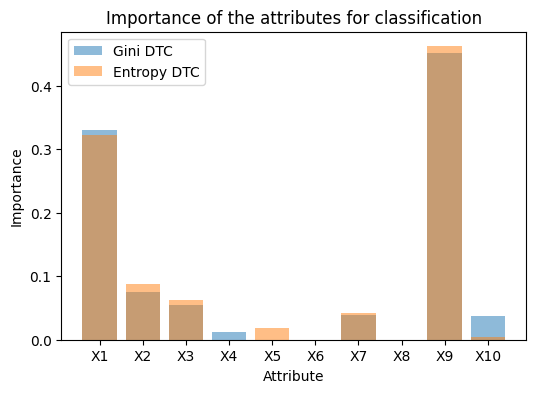

In [9]:
plt.figure(figsize=(6, 4))
plt.bar(feature_names, height=gini_dtc.feature_importances_, alpha=0.5, label='Gini DTC')
plt.bar(feature_names, height=entropy_dtc.feature_importances_, alpha=0.5, label='Entropy DTC')
plt.xlabel("Attribute")
plt.ylabel("Importance")
plt.title("Importance of the attributes for classification")
plt.legend()
plt.show()